In [106]:
import numpy as np
import matplotlib.pyplot as plt
import scipy

In [6]:
#ex3
def rectangular(Nw):
    return np.ones(Nw)


def hanning(Nw):
    return 0.5 * (1 - np.cos(2 * np.pi * np.arange(0, Nw) / Nw))


def extract_window(vector, window_width):
    "Extrage o porțiune de lungime dată de la mijlocul unui vector"
    midpoint = len(vector) // 2
    half_width = window_width // 2
    return vector[midpoint - half_width:midpoint + half_width]

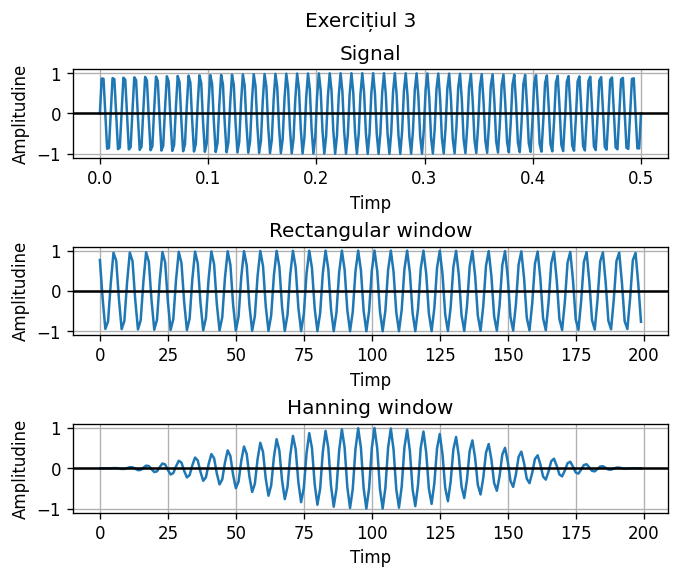

In [16]:
f = 100
Nw = 200
t = np.linspace(0, 0.5, 300)
x = np.sin(2 * np.pi * f * t)

#Fereastra dreptunghiulara
rectWindow = rectangular(Nw)

#Fereastra de tip Hanning
hanningWindow = hanning(Nw)

# Ferestrele o să aibă doar o parte din nr. original de eșantioane
windowed_x = extract_window(x, Nw)

fig, (ax1, ax2, ax3) = plt.subplots(3, dpi=120)
fig.suptitle('Exercițiul 3')
ax1.set_title("Signal")
ax1.plot(t, x)
ax2.set_title("Rectangular window")
ax2.plot(rectWindow * windowed_x)
ax3.set_title("Hanning window")
ax3.plot(hanningWindow * windowed_x)

for ax in (ax1, ax2, ax3):
    ax.axhline(y=0, color='black')
    ax.set(xlabel="Timp", ylabel="Amplitudine")
    ax.grid(True)

plt.subplots_adjust(hspace=1)
plt.show()

72


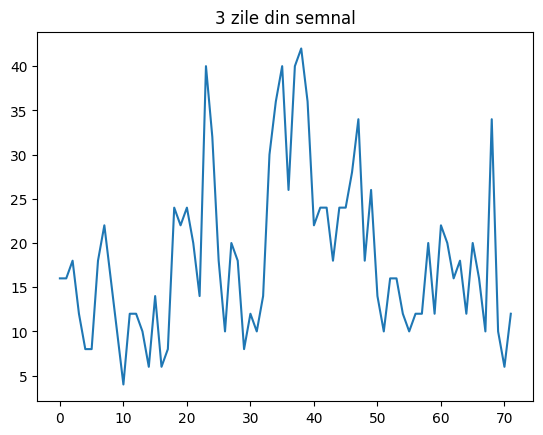

In [114]:
#ex4
#a
data = np.genfromtxt('Train.csv', delimiter=',')
x = [col[2] for col in data[4897:4969]]

print(len(x))

plt.title("3 zile din semnal")
plt.plot(x)

plt.show()

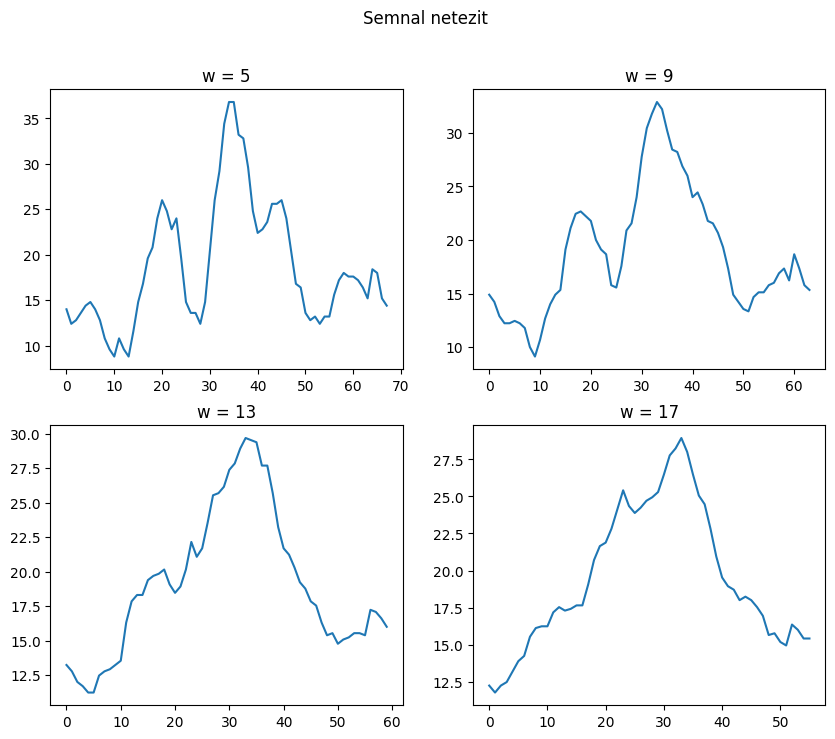

In [97]:
#b
def medie(w):
    return np.convolve(x, np.ones(w), 'valid') / w

var = [5, 9, 13, 17]

ma = [medie(i) for i in var]

fig, axs = plt.subplots(2, 2)
fig.suptitle('Semnal netezit')
fig.set_size_inches(10, 8)

axs[0][0].set_title(f'w = {var[0]}')
axs[0][0].plot(ma[0])
axs[0][1].set_title(f'w = {var[1]}')
axs[0][1].plot(ma[1])
axs[1][0].set_title(f'w = {var[2]}')
axs[1][0].plot(ma[2])
axs[1][1].set_title(f'w = {var[3]}')
axs[1][1].plot(ma[3])

plt.show()

In [104]:
#c
sampling_period = 3600
fs = 1 / sampling_period
fmax = fs / 2  # frecventa Nyquist

# În trafic există anumite perioade mai aglomerate când oamenii merg spre / se întorc de la locul de 
# muncă. Am estimat că o astfel de perioadă durează în jur de 5 ore, așa că aleg 
# să filtrez componentele cu frecvență mai mare de 1/(5 ore).

low_pass_freq = fs / 5
print(f'Frecvența de tăiere: {low_pass_freq:.8f} Hz')

# Normalizez
low_pass_freq = low_pass_freq / fmax
print(f'Frecvența de tăiere normalizată: {low_pass_freq} Hz')


Frecvența de tăiere: 0.00005556 Hz
Frecvența de tăiere normalizată: 0.4 Hz


In [112]:
#d
ordin = 5
rp = 5
butter_b, butter_a = scipy.signal.butter(ordin, low_pass_freq)
cheby_b, cheby_a = scipy.signal.cheby1(ordin, rp, low_pass_freq)

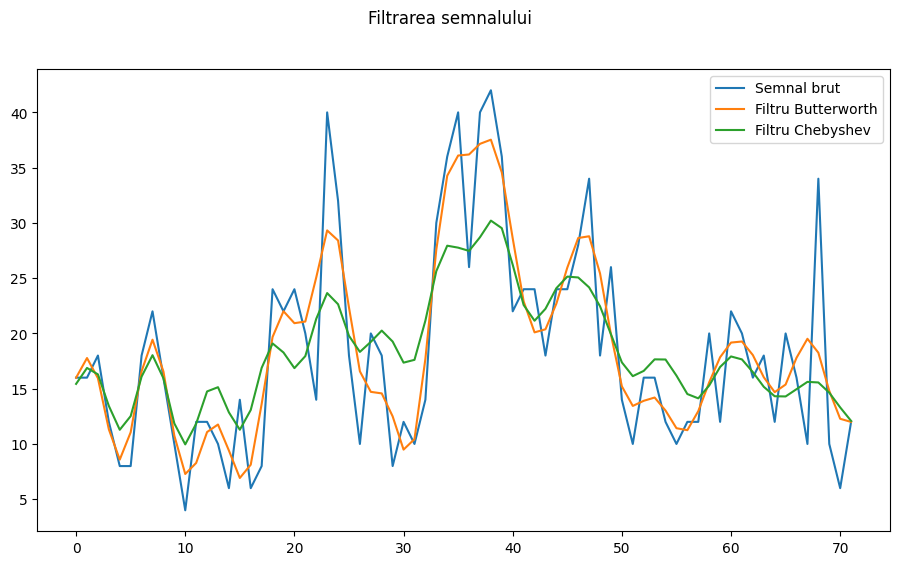

In [115]:
#e
butter_y = scipy.signal.filtfilt(butter_b, butter_a, x)
cheby_y = scipy.signal.filtfilt(cheby_b, cheby_a, x)

plt.figure(figsize=(11, 6))
plt.suptitle('Filtrarea semnalului')

plt.plot(x, label='Semnal brut')
plt.plot(butter_y, label='Filtru Butterworth')
plt.plot(cheby_y, label='Filtru Chebyshev')

plt.legend()
plt.show()

In [117]:
Cred ca filtrul Chebyshev ne ajuta sa intelegem datele cel mai bine, atenuand frecventele inalte, dar totodata evidentiind schimbarile de frecventa in trafic.

SyntaxError: invalid syntax (625701180.py, line 1)